## Notebook 13: Análise de regressão I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Neste Notebook, aprendemos a ajustar um modelo para um conjunto de dados. Na primeira parte deste Notebook, ajustámos vários modelos diferentes para o mesmo conjunto de dados, a que também se dá o nome de análise de regressão. Na segunda parte deste Notebook, vamos espreitar estas análises de regressão, debater como os melhores parâmetros podem ser calculados, como quantificar a qualidade do ajustamento e quais são os restantes parâmetros que algumas funções de regressão devolvem.

### Erro quadrático médio
Uma forma de quantificar o ajustamento entre os dados e um modelo é calcular o erro quadrático médio. O erro é definido como a diferença entre o valor observado e o valor modelado. Outro termo para o erro é o residual. Se o erro do ponto de dados $i$ for $\varepsilon_i$, e o número total de observações for $N$, a soma dos erros quadráticos $S$
é:

$$S = \sum{\varepsilon_i^2}$$

Quando o número total de observações é $N$, o erro quadrático médio $E$ é calculado como:

$$E=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum{\varepsilon_i^2}}$$

O erro quadrático médio é uma estimativa da qualidade do ajustamento e pode ser calculado para qualquer modelo e qualquer conjunto de dados.

### <a name="back1"></a>Exercício 1. Ajustar uma linha reta
Carregue os valores de $x,y$ de 20 pontos de dados a partir do ficheiro `xydatafit.dat`. Ajuste uma linha reta através dos dados, utilizando a função `linregress` do pacote `scipy.stats`. Note que a função `linregress` devolve 3 valores diferentes além do declive e da ordenada na origem (use `linregress?` para descobrir); mais informações sobre estes 3 valores adicionais posteriormente neste Notebook. Represente graficamente os dados e a linha reta ajustada. Adicione uma legenda. Adicione o erro quadrático médio como título do gráfico. Represente no ecrã os valores ótimos para o declive e a ordenada na origem da linha reta.

<a href="#ex1answer">Soluções do Exercício 1</a>

### <a name="back2"></a>Exercício 2. Ajustar um polinómio
Use os valores de $x,y$ de 20 pontos de dados a partir do ficheiro `xydatafit.dat`. Ajuste um polinómio de segundo grau (uma parábola) através dos dados com a função `np.polyfit`. Represente graficamente os dados e a parábola ajustada. Adicione uma legenda. Coloque o erro quadrático médio no título. O erro quadrático médio melhorou?

<a href="#ex2answer">Soluções do Exercício 2</a>

### Ajustar uma função arbitrária
As funções Python para ajustar uma linha reta ou um polinómio estão prontamente disponíveis. Existem muitas outras funções que poderá querer usar para ajustar os seus dados. A função `curve_fit` pode ser usada para uma função arbitrária definida por si; `curve_fit` faz parte do pacote `scipy.optimize`. A função `curve_fit` requer que escreva uma função que assume como primeiro argumento a variável independente (no nosso caso acima, os valores $x$), seguindo-se o(s) parâmetro(s) que pretende ajustar, e devolve o valor da função em todos os valores de $x$ para os parâmetros fornecidos. Por exemplo, para ajustar uma linha reta, tem de escrever uma função:

In [2]:
def func(x, a, b):
    return a * x + b

A função `curve_fit` tem de ser calculada com três argumentos: a função que pretende ajustar, os valores da variável independente (no nosso caso, $x$) e os valores da variável dependente (no nosso caso, $y$). A função `curve_fit` devolve um array com os parâmetros ótimos (numa lógica de quadrados mínimos) e um segundo array com a covariância dos parâmetros ótimos (voltamos a este tema mais tarde). Por exemplo, no caso do Exercício 1:

In [3]:
from scipy.optimize import curve_fit
x, y = np.loadtxt('xydatafit.dat')  # no caso de estes terem sido modificados num dos exercícios
popt, pcov = curve_fit(func, x, y)
print('parâmetros ótimos:', popt)

parâmetros ótimos: [  6.07744372  42.58245717]


Note que estes parâmetros ótimos são idênticos aos valores calculados no Exercício 1.

### <a name="back3"></a>Exercício 3. Ajustar uma função exponencial com `curve_fit`
Use os valores de $x,y$ de 20 pontos de dados a partir do ficheiro `xydatafit.dat`. Ajuste a função $f(x) = A\exp(ax) + b$ através dos dados com a função `curve_fit` do pacote `scipy.optimize`. Represente graficamente os dados e a função ajustada. Coloque o erro quadrático médio no título. O erro quadrático médio melhorou?

<a href="#ex3answer">Soluções do Exercício 3</a>

### Quadrados mínimos
Nos exercícios acima, os parâmetros *ótimos* foram obtidos com os métodos `linregress`, `polyfit` ou `curve_fit`. Mas como é que esses métodos o fazem? Ou talvez a questão mais importante seja: "O que é *ótimo*?". Neste Notebook, definimos *ótimo* como o conjunto de parâmetros que minimiza a soma dos erros quadrados (por isso, também minimiza o erro quadrático médio). Esta abordagem de otimização é também referida como uma abordagem dos quadrados mínimos.
Por exemplo, considere os três pontos de dados seguintes:

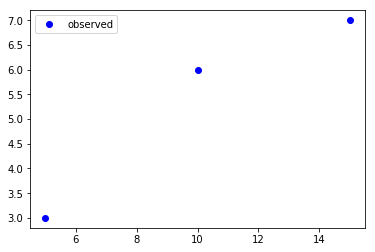

In [4]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
plt.plot(xdata, ydata, 'bo', label='observed')
plt.legend();

Podemos tentar ajustar uma linha reta através destes três pontos, mas já consegue ver que os três pontos não se encontram numa linha, pelo que não existe qualquer linha reta que passe exatamente nos três pontos. A linha reta é representada por $y=ax+b$, em que $a$ é o declive da linha e $b$ é a ordenada na origem (é o valor de $y$ para $x=0$). Escrevemos uma função que assume como argumentos de entrada um array de valores de $x$ observados e um array de valores de $y$ correspondentes, além de valores para o declive a e a ordenada na origem b. A função devolve a soma dos erros quadráticos, em que o erro é definido como a diferença entre o valor observado de $y$ e o valor da linha reta no mesmo valor de $x$. A equação para o erro no ponto $i$ é $\varepsilon_i$ e pode ser representada por:

$\varepsilon_i = y_i - (ax_i + b)$

In [5]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

Como pode ver, os valores diferentes de $a$ e $b$ dão valores diferentes para a soma dos erros quadráticos `sse` (*sum of squared errors*, em inglês). A função `sse` para $a=1$, $b=2$ é maior do que para $a=1$, $b=1$.

In [6]:
print('sse para a=1, b=2:', sse(a=1, b=2))
print('sse para a=1, b=1:', sse(a=1, b=1))

sse para a=1, b=2: 152.0
sse para a=1, b=1: 115.0


O que podemos fazer é calcular a função `sse` para um número superior de valores de $a$ e $b$. Se o fizermos numa grelha regular, podemos criar contornos da função `sse`. A função `sse` é constante ao longo de qualquer contorno. Um mapa de contorno da função `sse` é semelhante a um mapa de elevação. O objetivo é agora descobrir a combinação de $a$ e $b$ que dá o valor mais pequeno da soma dos erros quadráticos. No gráfico abaixo, pode ver que o valor mais pequeno de `sse` é obtido para $a\approx 0.4$, $b\approx 1.3$ (tem de olhar com atenção para o azul mais escuro da figura; a área posterior ao amarelo é $S>10$).

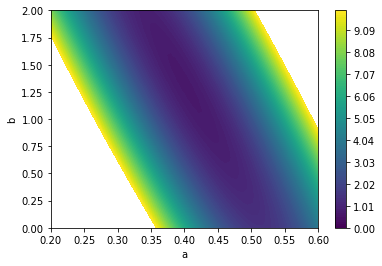

In [7]:
a, b = np.meshgrid(np.linspace(0.2, 0.6, 50), np.linspace(0, 2, 50))
ssevec = np.vectorize(sse)
z = ssevec(a, b)
plt.figure()
plt.contourf(a, b, z, np.linspace(0, 10, 100))
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b');

Como minimizamos a soma dos erros quadráticos? Como é habitual, encontramos o mínimo de uma função ao definir a derivada como zero. Isto é um pouco complexo, mas não é assim tão difícil. A soma dos erros quadráticos é representada por $E$:

$$
E=\sum_{i=1}^N\varepsilon_i^2=
\sum_{i=1}^N[y_i-(ax_i+b)]^2
$$

em que $N$ é o número de observações. O declive $a$ e a ordenada na origem $b$ são determinados, de forma que $E$ é minimizado, o que significa que as seguintes derivadas são zero:

$$\frac{\partial E}{\partial a}=0 \qquad \frac{\partial E}{\partial b}=0$$

A diferenciação dá (utilizando a regra da cadeia):

$$
\frac{\partial E}{\partial a}=\sum_{i=1}^N[2(y_i-ax_i-b)(-x_i)]=
2a\sum_{i=1}^Nx_i^2+2b\sum_{i=1}^Nx_i-2\sum_{i=1}^Nx_iy_i
$$

$$
\frac{\partial E}{\partial b}=\sum_{i=1}^N[2(y_i-ax_i-b)(-1)]=
2a\sum_{i=1}^Nx_i+2bN-2\sum_{i=1}^Ny_i
$$

Definir as derivadas como igual a zero e a divisão por 2 dá:

$$
a\sum_{i=1}^Nx_i^2+b\sum_{i=1}^Nx_i-\sum_{i=1}^Nx_iy_i=0
$$

$$
a\sum_{i=1}^Nx_i+bN-\sum_{i=1}^Ny_i=0
$$

Este sistema de duas equações lineares com duas incógnitas ($a$ e $b$) pode ser resolvido para dar:

$$ a=\frac{N\sum_{i=1}^Nx_iy_i-\sum_{i=1}^Nx_i\sum_{i=1}^Ny_i}
{N\sum_{i=1}^Nx_i^2-\sum_{i=1}^Nx_i\sum_{i=1}^Nx_i}
$$

$$
b=\bar{y}-a\bar{x}
$$
em que $\bar{x}$ e $\bar{y}$ são os valores médios de $x$ e $y$, respetivamente.

### <a name="back4"></a>Exercício 4. Ajustar uma linha reta (continuação)
Calcule os valores ótimos (na lógica de quadrados mínimos) de $a$ e $b$, usando as duas equações derivadas acima e a soma correspondente de erros quadráticos (usando os arrays `xdata` e `ydata` para os três pontos dados acima). Em seguida, use a função `linregress` do pacote `scipy.stats` para calcular os valores ótimos e verifique se a função `linregress` dá as mesmas respostas. Crie um gráfico que apresente os três pontos de dados e a respetiva linha reta ajustada.

<a href="#ex4answer">Soluções do Exercício 4</a>

### O coeficiente de correlação, o valor de $p$ e o erro padrão
A função `linregress` devolve 5 valores. Além do declive e da ordenada na origem, estes são de certa forma enigmaticamente definidos como o coeficiente de correlação, o valor de $p$ ($p$-value) e o erro padrão. Cada um destes três valores é uma quantificação da qualidade do ajustamento. De acordo com os académicos, estes termos na documentação `scipy.stats` são definidos de forma ligeiramente imprecisa (provavelmente, serão atualizados no futuro). O que significam é:

O quadrado do coeficiente de correlação $r$ é o valor de $r$ quadrado e é definido como:

$$r^2 = 1 - \sum{(y_i - \hat{y}_i)^2} \left/ \sum{(y_i - \bar{y})^2} \right. $$

em que $y_i$ é o valor de $y$ do ponto de dados $i$, enquanto que $\hat{y}_i$ são os valores ajustados no ponto de dados $i$. Também pode ser escrito como:

$$r^2 = \frac{\text{var}(y) - \text{var}(y-\hat{y})}{\text{var}(y)}$$

Assim o valor de $r^2$ é a variância de $y$ menos a variância dos residuais restantes (os valores de dados menos os valores ajustados), dividida pela variância de $y$, também designada "percentagem de variância explicada". Se o modelo passar exatamente pelos dados (um ajustamento perfeito), a variância dos residuais é zero e $r^2=1$. Se o modelo não for além da média de $y$, então $r^2$ estará muito próximo de zero. Um valor de $r^2$ próximo de 1 é geralmente positivo, mas não é possível afirmar de forma definitiva a qualidade do ajustamento ao reportar apenas o valor de $r^2$ (embora muitos o façam).

O erro padrão devolvido pelo modelo `linregress` é o desvio padrão estimado do declive ajustado. A equação é:

$$s = \sqrt{\frac{\sum(y_i-\hat{y}_i)^2}{N-2}} \left/ \sqrt{\sum{(x_i-\bar{x})^2}} \right.$$

O desvio padrão do declive deve ser interpretado tal como o desvio padrão da média. O declive calculado é um valor estatístico. Por isso, tem um desvio padrão estimado.

O $p$-value está relacionado com a questão se o declive estimado é significativamente diferente de zero. Quando o declive é significativamente diferente de zero, pode afirmar que há uma relação linear entre as duas variáveis. O $p$-value está relacionado com a questão se o declive estimado é significativamente diferente de zero quando efetua um teste $t$. Quando o valor de $p$ é inferior a 0.05, isso significa que, quando efetua um teste $t$
bilateral, pode rejeitar a hipótese nula de que o declive é zero, a favor da hipótese alternativa de que o declive não é zero. Para simplificar: significa que há menos de 5% de hipótese de o declive ser zero e mais de 95% de hipótese de o declive não ser zero. Ou ainda mais simples: o declive é significativamente diferente de zero.

### <a name="back5"></a>Exercício 5. Verificação dos parâmetros da qualidade do ajustamento
Implemente as equações para $r^2$ e $s$ dadas acima para verificar se os valores devolvidos pela função `linregress` estão corretos. Efetue um teste de hipótese bilateral com um nível de significância de 5%, em que a hipótese nula é o declive da linha ajustada ser igual a zero e a hipótese alternativa é o declive não ser igual a zero. Represente a função da densidade de probabilidade de uma distribuição $t$ com uma média de 0 e um desvio padrão igual ao valor calculado de $s$. Use $N−2$ como o número de graus de liberdade (subtraia o número de parâmetros de $N$, pois esgotou estes dois graus de liberdade). Represente linhas verticais vermelhas que indiquem os percentis 2,5% e 97,5% de acordo com a distribuição $t$. Represente uma linha vertical preta na posição do valor calculado do declive. Decida se pode rejeitar a hipótese nula de que o declive é zero, a favor da hipótese alternativa de que o declive não é zero, e adicione essa informação como título da figura.

<a href="#ex5answer">Soluções do Exercício 5</a>

### Significado de $p$-value
Se resolveu o exercício anterior corretamente, descobriu que o declive não foi significativamente diferente de zero (não pode rejeitar a hipótese nula de que o declive é zero com nível de significância de 5%). O $p$-value devolvido pela função `linregress` significa que, se tivesse efetuado a hipótese com nível de significância $p$, não teria rejeitado a hipótese. Vamos experimentar. Primeiro, voltamos a calcular o $p$-value e o valor de $s$ da linha ajustada.

In [8]:
from scipy.stats import linregress
slope, intercept, r, p, s = linregress(xdata, ydata)
print('p value:', p, 'valor de s:', s)

p value: 0.178912375022 valor de s: 0.115470053838


In [9]:
from scipy.stats import t
p1, p2 = t.ppf([p / 2, 1 - p / 2], 1, loc=0, scale=s)
print('limite superior e inferior para o nível de significância', p, 'é:', p1, p2)

limite superior e inferior para o nível de significância 0.178912375022 é: -0.400000000004 0.400000000004


Para ser completo, podemos calcular o $p$-value a partir da distribuição $t$ da seguinte forma:

In [10]:
print('p-value a partir da distribuição t:', 2 * (1 - t.cdf(a, 1, loc=0, scale=s)))

p-value a partir da distribuição t: [[ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]
 [ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]
 [ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]
 ..., 
 [ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]
 [ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]
 [ 0.33333333  0.322417    0.31213621 ...,  0.12433906  0.12266646
   0.12103772]]


Lembre-se de que o $p$-value apenas faz sentido se os residuais forem independentes e distribuídos normalmente. Para o problema que temos em mãos com 3 pontos de dados é, claro, impossível saber. Mas quando tem mais dados, tem mesmo de verificar ou, em alternativa, usar um método que não exija o pressuposto de Normalidade.

Uma última questão sobre o nível de significância. Dizemos que o declive é significativamente diferente de zero quando $p<0.05$. Mas isso significa que há ainda 5% de hipótese de que o declive seja diferente de zero por acaso. Vamos experimentá-lo no exercício seguinte.

### <a name="back6"></a>Exercício 6. Obter um valor de $p<0.05$ por acaso
Efetue a seguinte experiência: gere 100 valores de $x$ aleatoriamente a partir de uma distribuição uniforme entre 0 e 10, através da função `np.random.rand`. Gere 100 valores de $y$ aleatoriamente, a partir de uma distribuição uniforme entre 0 e 10. Ajuste uma linha reta utilizando `linregress`. Efetue a experiência 1000 vezes e conte o número de vezes em que o $p$-value é inferior a 0.05. Como verá, obterá cerca de 50 em 1000 experiências em que a linha é ajustada com um $p$-value inferior a 0.05 apenas por acaso (uma vez que não existe correlação entre os valores aleatórios de $x$ e $y$).

<a href="#ex6answer">Soluções do Exercício 6</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

declive, ordenada na origem: 6.07744370031 42.5824573588


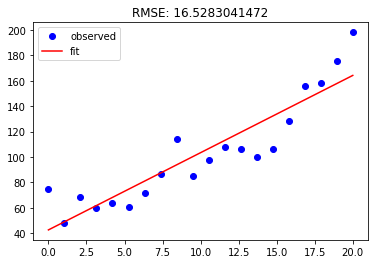

In [11]:
from scipy.stats import linregress
x, y = np.loadtxt('xydatafit.dat')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
yfit = slope * x + intercept
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse))
plt.legend(loc='best')
print('declive, ordenada na origem:', slope, intercept)

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

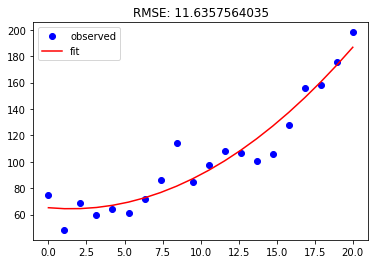

In [12]:
x, y = np.loadtxt('xydatafit.dat')
a, b, c = np.polyfit(x, y, 2)
yfit = a * x ** 2 + b * x + c
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.legend(loc='best')
plt.title('RMSE: '+str(rmse));

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

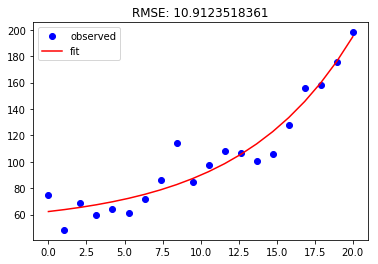

In [13]:
from scipy.optimize import curve_fit

def func(x, A, a, b):
    y = A * np.exp(a * x) + b
    return y

popt, pcov = curve_fit(func, x, y)
yfit = func(x, *popt)
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
plt.legend(loc='best')
rmse2 = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse2));

<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

In [14]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

In [15]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
N = len(xdata)
a = (N * np.sum(xdata * ydata) - np.sum(xdata) * np.sum(ydata) ) / \
    (N * np.sum(xdata ** 2) - np.sum(xdata) * np.sum(xdata))
b = np.mean(ydata) - a * np.mean(xdata)
print('valores ótimos de a e b:', a, b)
print('sse:', sse(a, b))

valores ótimos de a e b: 0.4 1.33333333333
sse: 0.666666666667


In [16]:
from scipy.stats import linregress
slope, intercept, r, p, s = linregress(xdata, ydata)
print('declive e ordenada na origem de acordo com linregress:', slope, intercept)

declive e ordenada na origem de acordo com linregress: 0.4 1.33333333333


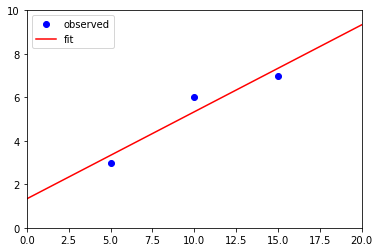

In [17]:
plt.plot(xdata, ydata, 'bo', label='observed')
plt.xlim(0, 20)
plt.ylim(0, 10)
x = np.linspace(0, 20, 2)
yfit = a * x + b
plt.plot(x, yfit, 'r', label='fit')
plt.legend(loc='best');

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

In [18]:
yfit = a * xdata + b
print('r quadrado de acordo com a fórmula:', end=' ')
print(1 - sum((ydata - yfit) ** 2) / sum((ydata - np.mean(ydata)) ** 2))
print('r quadrado de acordo com linregress:', r**2)

r quadrado de acordo com a fórmula: 0.923076923077
r quadrado de acordo com linregress: 0.923076923077


In [19]:
print('desvio padrão do declive de acordo com a fórmula:', end=' ')
print(np.sqrt(np.sum((ydata - yfit)**2) / (N - 2)) / np.sqrt(np.sum((xdata - np.mean(xdata)) ** 2)))
print('desvio padrão do declive de acordo com linregress:', s)

desvio padrão do declive de acordo com a fórmula: 0.115470053838
desvio padrão do declive de acordo com linregress: 0.115470053838


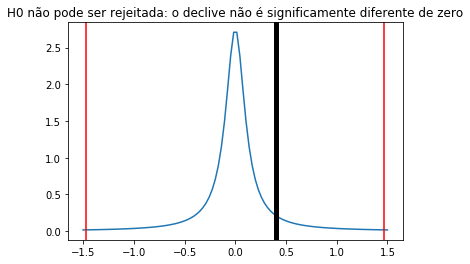

In [20]:
from scipy.stats import t
x = np.linspace(-1.5, 1.5, 100)
y = t.pdf(x, 1, loc=0, scale=s)
plt.figure()
plt.plot(x, y)
p025, p975 = t.ppf([0.025, 0.975], 1, loc=0, scale=s)
plt.axvline(p025, color='r')
plt.axvline(p975, color='r')
plt.axvline(a, color='k', lw=5)
plt.title('H0 não pode ser rejeitada: o declive não é significamente diferente de zero');

<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Soluções do Exercício 6</a>

In [21]:
count = 0
for i in range(1000):
    x = np.random.rand(100)
    y = np.random.rand(100)
    slope, intercept, r, p, s = linregress(x, y)
    if p < 0.05:
        count += 1
print('número de 1000 experiências onde p < 0.05:', count)

número de 1000 experiências onde p < 0.05: 42


<a href="#back6">Voltar ao Exercício 6</a>

A obra "Notebook 13: Análise de regressão I" é um derivado de [Notebook 13: Regression analysis I](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook13_regression1/py_exploratory_comp_13_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt). "Notebook 13: Análise de regressão I" é publicado sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt) por Educa2030.